In [3]:
from dash import dcc, html, Input, Output, Dash
import plotly.express as px
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv ("merged_APPA_data.zip", encoding='windows-1252') 
df=df[df.Valore != 'n.d.']
df.Valore= pd.to_numeric(df.Valore)


               Valore
Data                 
2012-01-31  28.848033
2012-02-29  34.588406
2012-03-31  29.633508
2012-04-30  14.712938
2012-05-31  16.901351
...               ...
2022-03-31  34.386632
2022-04-30  15.616667
2022-05-31  17.835724
2022-06-30  20.998597
2022-07-31  16.644970

[127 rows x 1 columns]


,Valore
Data,
2012-01-31,28.848033
2012-02-29,34.588406
2012-03-31,29.633508
2012-04-30,14.712938
2012-05-31,16.901351
...,...
2022-03-31,34.386632
2022-04-30,15.616667
2022-05-31,17.835724


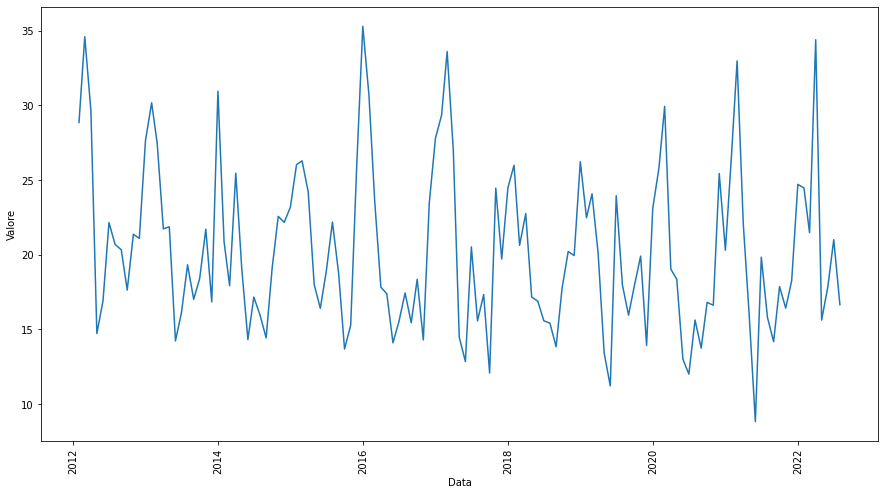

In [6]:
from matplotlib.pyplot import xticks

local = "Parco S. Chiara"
pollutant = "PM10"
df["Data"] = pd.to_datetime(df.Data)
df_schiara = df[(df.Stazione == local) & (df.Inquinante == pollutant)]
df_schiara = df_schiara.resample("M", on="Data").mean()
print(df_schiara)
df_schiara["Valore"] = pd.to_numeric(df_schiara.Valore)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Data", data=df_schiara)
xticks(rotation = 90)
df_schiara

In [4]:
df["anno"]=df.Data.str[0:4]
df["mese"]=df.Data.str[5:7]
df=df.reset_index()
df

,index,Stazione,Inquinante,Data,Valore,UnitÃ di misura,anno,mese
0,0,A22 (Avio),Biossido di Azoto,2017-01-01 01:00:00,54.0,Âµg/mc,2017,01
1,1,A22 (Avio),Biossido di Azoto,2017-01-01 02:00:00,58.0,Âµg/mc,2017,01
2,2,A22 (Avio),Biossido di Azoto,2017-01-01 03:00:00,54.0,Âµg/mc,2017,01
3,3,A22 (Avio),Biossido di Azoto,2017-01-01 04:00:00,54.0,Âµg/mc,2017,01
4,4,A22 (Avio),Biossido di Azoto,2017-01-01 05:00:00,50.0,Âµg/mc,2017,01
...,...,...,...,...,...,...,...,...
2278753,2278753,Via Bolzano,PM10,2022-07-07 20:00:00,15.0,Âµg/mc,2022,07
2278754,2278754,Via Bolzano,PM10,2022-07-07 21:00:00,13.0,Âµg/mc,2022,07
2278755,2278755,Via Bolzano,PM10,2022-07-07 22:00:00,16.0,Âµg/mc,2022,07
2278756,2278756,Via Bolzano,PM10,2022-07-07 23:00:00,14.0,Âµg/mc,2022,07


In [5]:
df=df.groupby(["Inquinante","Stazione","mese","anno"]).mean()
df=df.reset_index()
df

,Inquinante,Stazione,mese,anno,index,Valore
0,Biossido Zolfo,Parco S. Chiara,01,2012,619600.0,2.931973
1,Biossido Zolfo,Parco S. Chiara,01,2013,628417.5,3.394309
2,Biossido Zolfo,Parco S. Chiara,01,2014,637260.5,3.168022
3,Biossido Zolfo,Parco S. Chiara,01,2015,645942.5,3.202703
4,Biossido Zolfo,Parco S. Chiara,01,2016,654726.5,3.947439
...,...,...,...,...,...,...
3148,PM2.5,Rovereto,12,2017,1962746.0,22.096644
3149,PM2.5,Rovereto,12,2018,1971564.5,19.993280
3150,PM2.5,Rovereto,12,2019,1979802.0,16.966717
3151,PM2.5,Rovereto,12,2020,1987968.0,14.117005


In [7]:
app=Dash(__name__)
app.layout= html.Div([
    html.H4 ("montly variations in pollutants"),
    dcc.Dropdown(
        id="dropdown",
        multi=True),
        dcc.Graph(id="graph"),
])

def update_plot2(input= "dropdown"):
    gas = "PM10"
    return

@app.callback(
    Output("graph","figure"),
    Input("dropdown","value")
)
def update_Graph(graph):
    fig= px.line(
        df,
        x="mese",
        y="Valore"
    )
    return fig  

app.run_server(debug=True,port=8052)



Dash is running on http://127.0.0.1:8052/

Dash is running on http://127.0.0.1:8052/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Address already in use
Port 8052 is in use by another program. Either identify and stop that program, or start the server with a different port.


AssertionError: 